<a href="https://colab.research.google.com/github/royam0820/Python/blob/main/Python_Session_4_Enseignant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4 : Explorer l'IA avec Python 🤖

Bienvenue à la quatrième session ! Aujourd'hui, nous allons plonger dans le monde passionnant de l'IA en créant des projets simples et amusants avec Python. Préparez-vous à voir l'IA en action ! 🚀

Projets IA:
- Classificateur d'images
- Chatbot

---


## 1. Introduction à l'IA avec Python
Lors de la session précédente, nous avons appris ce qu'est l'IA et comment elle fonctionne avec des données. Aujourd'hui, nous allons mettre cela en pratique en créant deux projets :
- Un **classificateur d'images** avec Teachable Machine.
- Un **chatbot simple** avec lequel vous pourrez interagir.

Ces projets vous montreront comment l'IA peut être utilisée pour résoudre des problèmes réels de manière ludique !

---

## 2. Projet 1 : Classificateur d'images avec Teachable Machine

### Qu'est-ce que Teachable Machine ? 🧠
Teachable Machine est un outil en ligne qui vous permet de créer des modèles d'IA sans écrire de code. Vous pouvez entraîner un modèle à reconnaître des images, des sons ou des poses en lui montrant des exemples.

### Création d'un classificateur d'images
Nous allons créer un classificateur qui peut reconnaître les signes "pierre", "papier" et "ciseaux" à partir d'images.

1. **Allez sur [Teachable Machine](https://teachablemachine.withgoogle.com/)** et cliquez sur "Commencer".
2. **Choisissez "Projet Image"** pour commencer à entraîner votre modèle.
3. **Créez deux classes** : "dogs", "cats".
4. **Entraînez le modèle** :
   - Pour chaque classe, téléchargez ou capturez au moins **10 images** de chaque signe (vous pouvez utiliser votre webcam ou des images en ligne).
   - Cliquez sur "Entraîner le modèle" une fois que vous avez ajouté suffisamment d'exemples.
5. **Testez votre modèle** en utilisant la webcam ou en téléchargeant des images pour voir s'il reconnaît correctement les signes.

### Intégration dans Google Colab
Une fois votre modèle entraîné, vous pouvez l'exporter et l'utiliser dans Google Colab.



1. **Exportez le modèle** :
   - Cliquez sur "Exporter le modèle" dans Teachable Machine.
   - Choisissez "**TensorFlow.js**" et copiez le lien du modèle.

2. **Utilisez le modèle dans Colab** :
   - Ouvrez un nouveau notebook Colab.
   - Installez les bibliothèques nécessaires :
     

**Astuce** : Vous pouvez trouver des images en ligne ou utiliser des liens d'images que vous avez déjà.

---

### Image Classifier - Cats vs Dogs

### 1. Exporter le modèle depuis Teachable Machine :
- Dans l'interface de Teachable Machine cliquez sur le bouton « **Exporter le modèle** » à droite.
- Choisissez le format « **TensorFlow** » « **Keras** » et clicquez sur le bouton de téléchargement du modèle.
- Une fois le téléchargement effectué, votre fichier zippé contiendra deux fichiers :
  - labels.txt
  - keras_model.h5

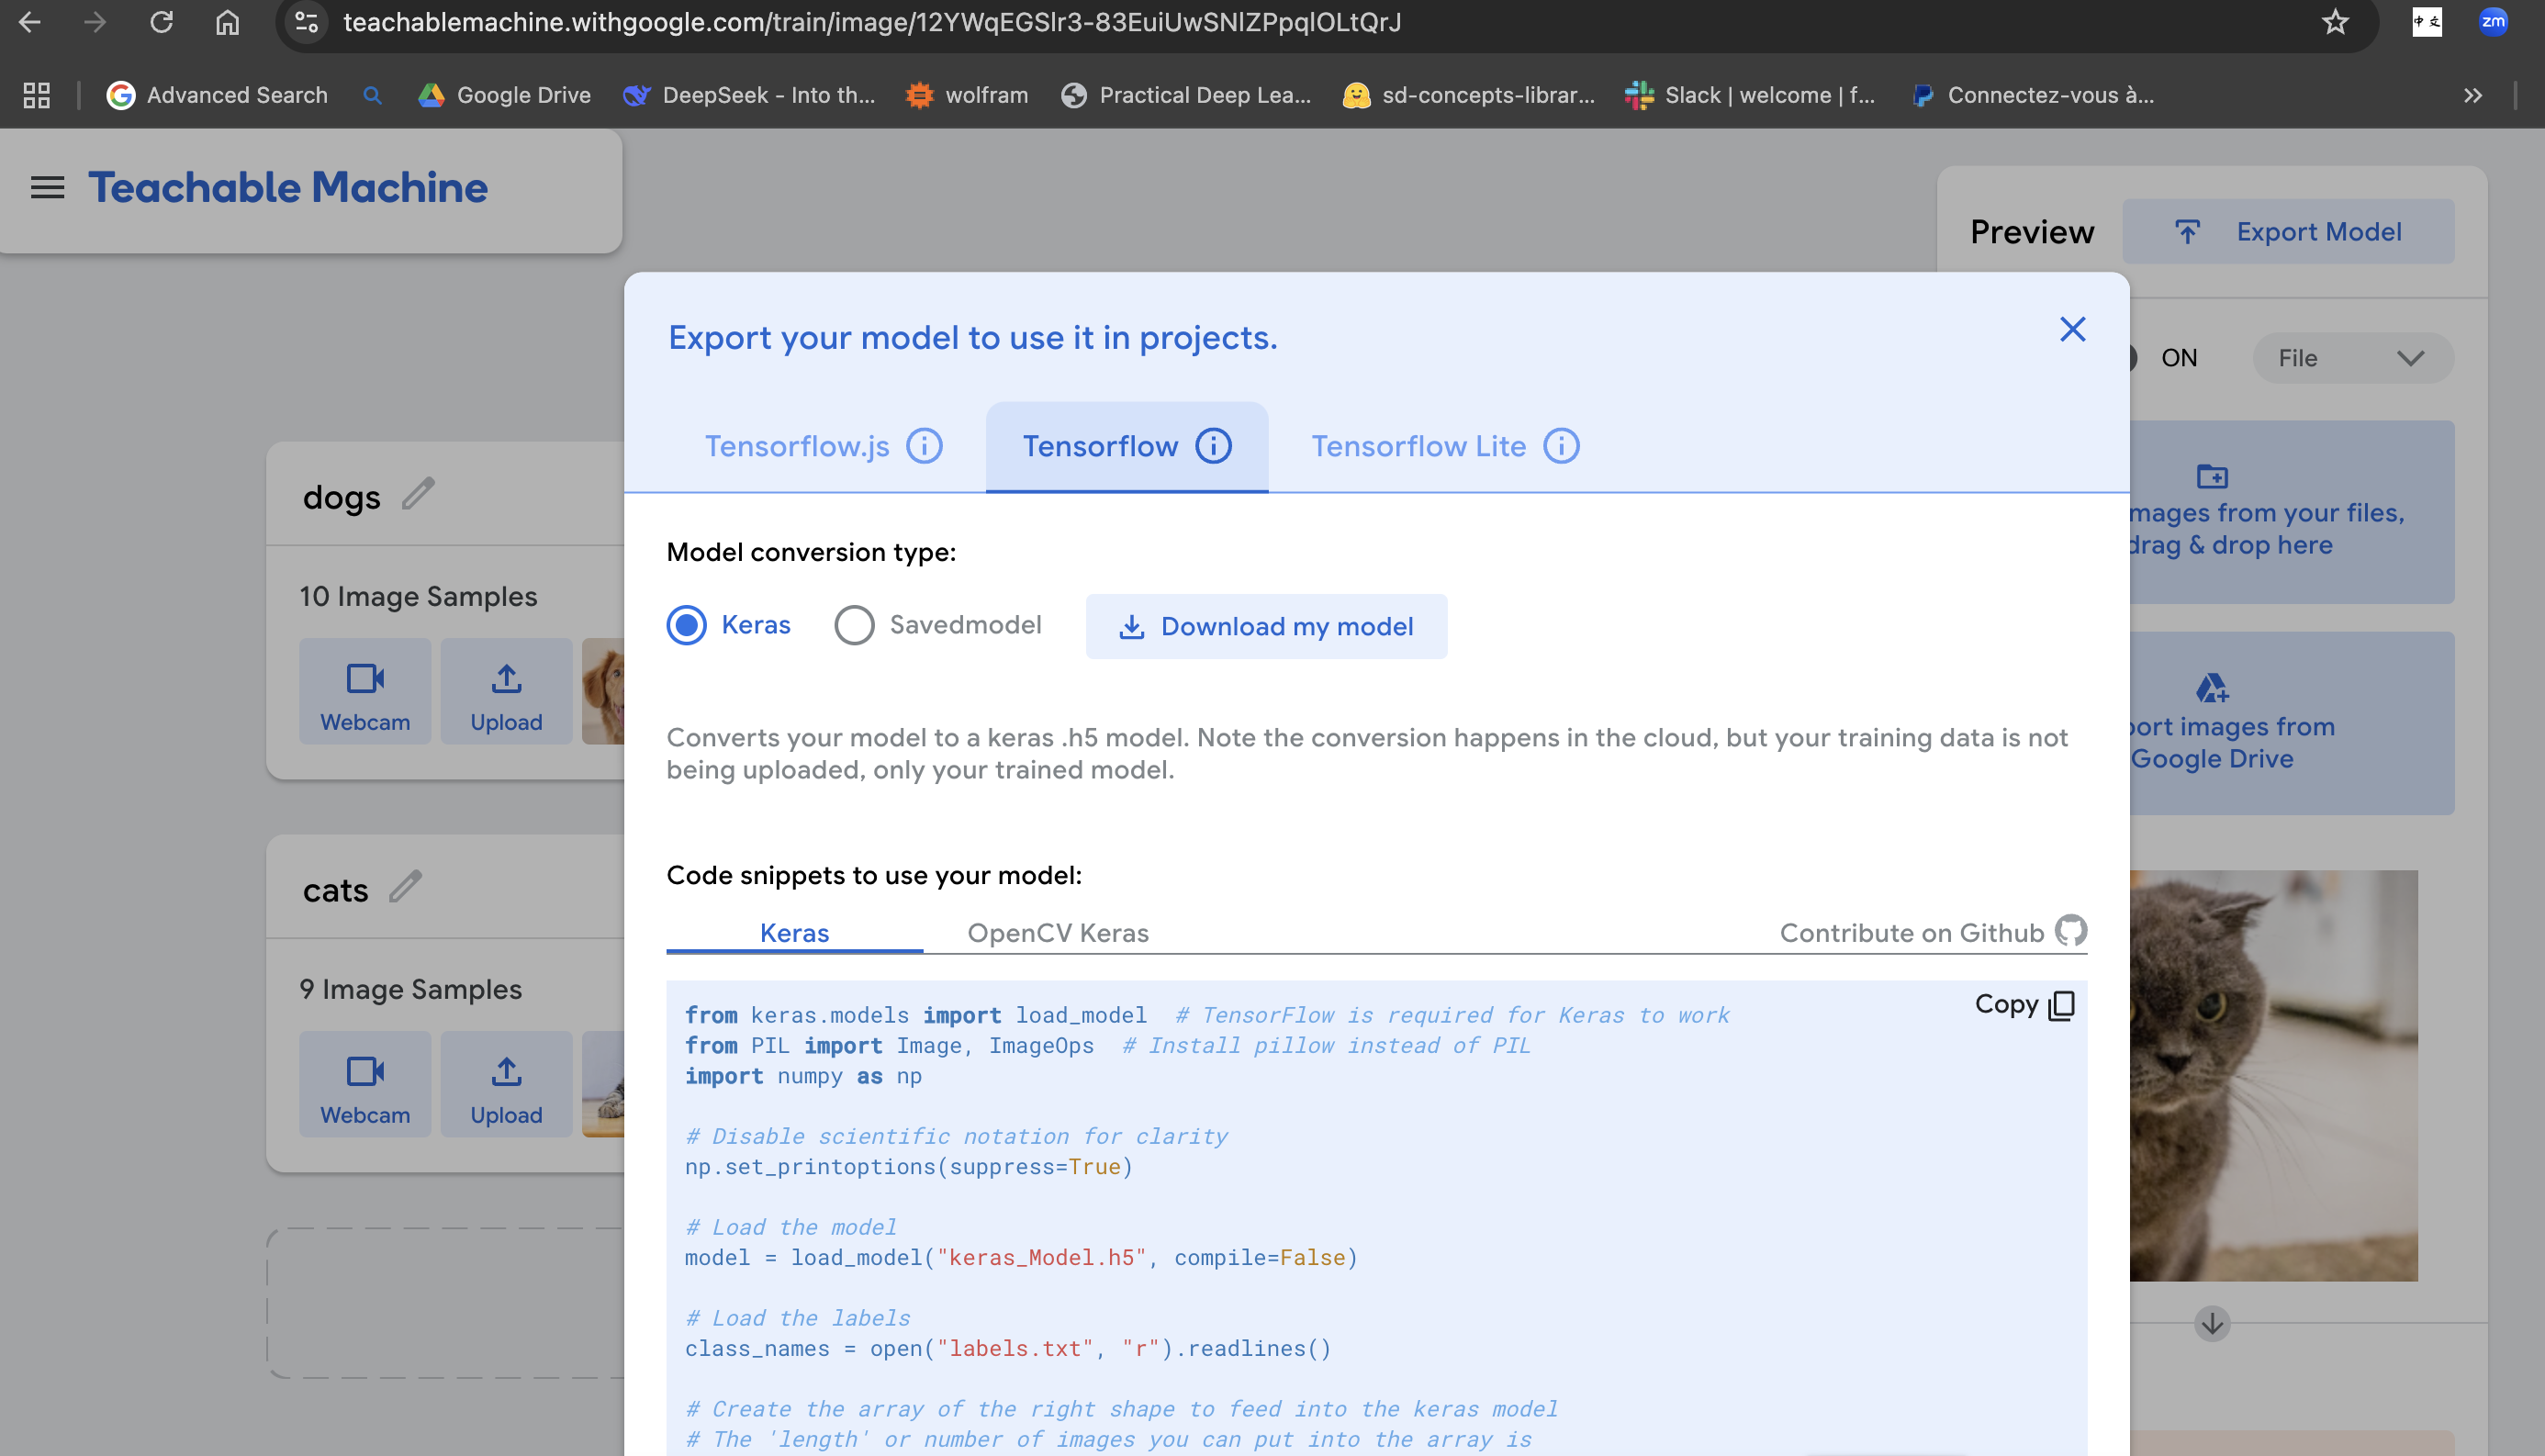

Décompressez le fichier dans Colab

### Utilisation du modèle Keras et Test du modèle avec Python

In [3]:
# Décompression du fichier /content/converted_keras.zip
# Remplacez 'your_file.zip' par le nom de votre fichier zip.
!unzip converted_keras.zip

# Si vous souhaitez extraire les fichiers dans un répertoire spécifique, vous pouvez utiliser l'option -d
# !unzip your_file.zip -d your_directory

Archive:  converted_keras.zip
 extracting: keras_model.h5          
 extracting: labels.txt              


Veuillez télécharger une image :


Saving tst2.jpg to tst2.jpg


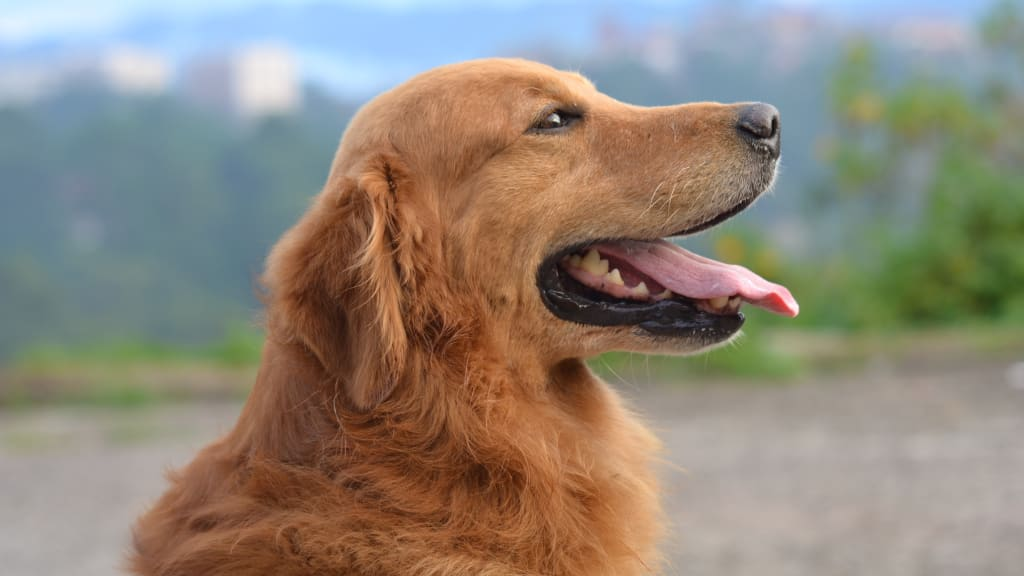

In [2]:
from google.colab import files
from IPython.display import Image, display

print("Veuillez télécharger une image :")
uploaded_image = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded_image.keys())[0]

# Display the uploaded image
display(Image(image_path))

In [3]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
from google.colab import files # Import files for uploading

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Use the image_path from the uploaded image
image = Image.open(image_path).convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 [==============================] - 1s 1s/step
Class: dog
Confidence Score: 0.9998153


## 3. Projet 2 : Interaction avec un chatbot simple

### Qu'est-ce qu'un chatbot ? 💬
Un chatbot est un programme qui peut converser avec vous comme un ami. Il utilise l'IA pour comprendre ce que vous dites et répondre de manière appropriée.

### Interaction avec un chatbot pré-construit

1. **Installez ChatterBot** dans votre notebook Colab :
Les lignes de code ci-dessous préparent le terrain en rendant disponibles les classes nécessaires pour créer une instance de chatbot et l'entraîner à partir de données textuelles.

**Créez un chatbot** :

NB: le chatbot doit utiliser un vocabulaire de référence en français qu'il faut télécharger et installer dans le répertoire Google Colab à la racine (/content).

 https://raw.githubusercontent.com/gunthercox/chatterbot-corpus/refs/heads/master/chatterbot_corpus/data/french/conversations.yml

enregistrer le fichier brut `conversations.yml` localement sous `french.yml`

Télécharger ce fichier de votre répertoire local vers Google Colab.

Vous devez stocker ce fichier dans ce chemin:
 `/content/french.yml`


In [ ]:
!pip  install chatterbot

In [ ]:
import os
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer

# Create a ChatBot instance
chatbot = ChatBot('MyChatBot')

# Create a trainer and train the chatbot
trainer = ChatterBotCorpusTrainer(chatbot)

# Use the built-in corpus reference


trainer.train("/content/french.yml")  # Adjust the path to match where you uploaded the file

while True:
    try:
        user_input = input("Vous : ")
        if user_input.lower() == 'quit':
            break
        response = chatbot.get_response(user_input)
        print("Bot : ", response)
    except (KeyboardInterrupt, EOFError, SystemExit):
        break

ChatterBot Corpus Trainer: 1it [00:00, 10.41it/s]


Vous : bonjour ca va
Bot :  Je vais bien merci, et toi ?
Vous : qui es tu
Bot :  C'est la reponse a laquelle on essaie tous de repondre...
Vous : quel est ton livre préféré
Bot :  La classique H2G2, et en complet, l'ensemble de l atrilogie en 5 volumes.
Vous : tu travailles sur quel projet
Bot :  Sur quoi travailles-tu ?
Vous : toi, tu travailles sur quel projet
Bot :  Sur quoi travailles-tu ?


**Astuce** : Tapez "quit" pour arrêter la conversation.

### Comprendre comment le chatbot fonctionne
Le chatbot utilise des données d'entraînement pour apprendre à répondre aux questions. Plus il a de données, mieux il peut converser !

---

### Entraînement d'un chatbot
Ce code définit et entraîne un chatbot à l'aide de la bibliothèque ChatterBot en Python.

Nous allons accéder à un fichier de données pour entraîner un chatbot et permettant ainsi d'avoir des réponses plus spécifiques.

In [ ]:
# from chatterbot import ChatBot
# from chatterbot.trainers import ChatterBotCorpusTrainer, ListTrainer
# import os

# chatbot = ChatBot('MonChatBot')

# # First train with the built-in French corpus
# corpus_trainer = ChatterBotCorpusTrainer(chatbot)
# corpus_trainer.train('chatterbot.corpus.french')

# # Then train with your custom conversation
# custom_data_path = '/content/drive/MyDrive/Python-Sessions/Ressources/Chatbot/custom_french.yml'
# if os.path.exists(custom_data_path):
#     corpus_trainer.train(custom_data_path)

# # Test interaction
# print("Tapez 'quit' pour quitter.")
# while True:
#     try:
#         user_input = input("Vous : ")
#         if user_input.lower() == 'quit':
#             break
#         response = chatbot.get_response(user_input)
#         print("Bot :", response)
#     except (KeyboardInterrupt, EOFError, SystemExit):
#         break


In [ ]:
# Install required packages
!pip install chatterbot==1.0.8
!pip install chatterbot-corpus
!pip install spacy
!python -m spacy download fr_core_news_sm

ERROR: Ignored the following yanked versions: 1.1.0
ERROR: Ignored the following versions that require a different python version: 1.0.7 Requires-Python >=3.4, <=3.8; 1.0.8 Requires-Python >=3.4, <=3.8
ERROR: Could not find a version that satisfies the requirement chatterbot==1.0.8 (from versions: 0.0.0, 0.0.1, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.1.0, 0.1.1, 0.1.2, 0.2.0, 0.2.1, 0.2.2, 0.2.3, 0.2.4, 0.2.5, 0.2.6, 0.2.7, 0.2.8, 0.2.9, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 0.3.4, 0.3.5, 0.3.6, 0.3.7, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.4.6, 0.4.7, 0.4.8, 0.4.9, 0.4.10, 0.4.11, 0.4.12, 0.4.13, 0.5.0, 0.5.1, 0.5.2, 0.5.3, 0.5.4, 0.5.5, 0.6.0, 0.6.1, 0.6.2, 0.6.3, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.7.6, 0.8.0, 0.8.1, 0.8.2, 0.8.3, 0.8.4, 0.8.5, 0.8.6, 0.8.7, 1.0.0a1, 1.0.0a2, 1.0.0a3, 1.0.0a4, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0a7, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 1.2.6, 1.2.7)
ERROR: No matching distribution found for chatterbot==1.0.8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer, ListTrainer
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Initialize chatbot
chatbot = ChatBot(
    'MonChatBot',
    storage_adapter='chatterbot.storage.SQLStorageAdapter',
    database_uri='sqlite:///database.sqlite3'
)

# Train with built-in French corpus
try:
    corpus_trainer = ChatterBotCorpusTrainer(chatbot)
    corpus_trainer.train('chatterbot.corpus.french')
    print("Training with French corpus completed.")
except Exception as e:
    print(f"Error training with corpus: {e}")

# Train with custom YAML file
custom_data_path = '/content/drive/MyDrive/Python-Sessions/Ressources/Chatbot/custom_french.yml'
if os.path.exists(custom_data_path):
    try:
        corpus_trainer.train(custom_data_path)
        print("Training with custom YAML completed.")
    except Exception as e:
        print(f"Error training with custom YAML: {e}")
else:
    print(f"Custom data file not found at {custom_data_path}")

# Train with a fallback custom conversation list
list_trainer = ListTrainer(chatbot)
custom_conversation = [
    "Bonjour, comment vas-tu ?", "Je vais bien, merci ! Et toi ?",
    "Quel temps fait-il aujourd'hui ?", "Il fait beau, profite du soleil !",
    "Que fais-tu ?", "Je suis ici à discuter avec des humains sympas comme toi !"
]
try:
    list_trainer.train(custom_conversation)
    print("Training with custom conversation list completed.")
except Exception as e:
    print(f"Error training with custom list: {e}")

# Interactive loop
print("Tapez 'quit' pour quitter.")
while True:
    try:
        user_input = input("Vous : ")
        if user_input.lower() == 'quit':
            break
        response = chatbot.get_response(user_input)
        print(f"Bot : {response}")
    except (KeyboardInterrupt, EOFError, SystemExit):
        print("Exiting chatbot...")
        break
    except Exception as e:
        print(f"Error during interaction: {e}")

# Save the trained model (optional)
from google.colab import files
files.download('database.sqlite3')
print("Chatbot session ended.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ChatterBot Corpus Trainer: 5it [00:01,  4.98it/s]


Training with French corpus completed.


ChatterBot Corpus Trainer: 1it [00:00,  1.61it/s]


Training with custom YAML completed.


List Trainer: 6it [00:00, 524.18it/s]


Training with custom conversation list completed.
Tapez 'quit' pour quitter.
Vous : bonjour comment vas tu
Bot : Je vais bien merci, et toi ?
Vous : quel temps fait il aujourd'hui
Bot : Il fait beau, profite du soleil !
Vous : quitter
Bot : Ca va
Vous : quit


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Chatbot session ended.


## 3. Projet 3 : Interaction avec un chatbot d'OpenAI  

In [ ]:
# Importer les bibliothèques nécessaires
from google.colab import userdata
import openai
import sys
import io

# Configurer l'encodage UTF-8 pour éviter les erreurs de caractères
# La ligne suivante cause une erreur dans Colab et n'est généralement pas nécessaire
# sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')

# Récupérer la clé API depuis Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

# Initialiser le client OpenAI avec la clé API
client = openai.OpenAI(api_key=api_key)

# Fonction pour parler avec le chatbot
def discuter_avec_chatbot():
    print("Bienvenue dans le Chatbot ! Tape 'quitter' pour arrêter.")

    while True:
        # Demander à l'utilisateur ce qu'il veut dire
        message = input("Toi : ")

        # Si l'utilisateur tape 'quitter', arrêter le programme
        if message.lower() == 'quitter':
            print("Au revoir !")
            break

        try:
            # Envoyer le message à l'API OpenAI
            reponse = client.chat.completions.create(
                model="gpt-3.5-turbo",  # Modèle utilisé (simple et efficace)
                messages=[
                    {"role": "system", "content": "Tu es un assistant amusant et gentil qui répond de manière simple pour des enfants."},
                    {"role": "user", "content": message}
                ]
            )

            # Afficher la réponse du chatbot
            print("Chatbot :", reponse.choices[0].message.content)

        except Exception as e:
            # En cas d'erreur, afficher un message clair
            print("Oups, une erreur s'est produite ! Essaie encore. Détail :", str(e))

# Lancer le chatbot
discuter_avec_chatbot()

 ## 4. Projet 4 : Interaction avec un chatbot d'OpenAI - Thème Harry Potter

In [ ]:
# Importer les bibliothèques pour faire marcher notre super chatbot magique !
from google.colab import userdata
import openai
import textwrap  # Ajouté pour gérer le retour à la ligne automatiquement

# Récupérer la clé magique (API key) depuis les Secrets de Colab
api_key = userdata.get('OPENAI_API_KEY')

# Créer le client OpenAI pour parler à notre assistant magique
client = openai.OpenAI(api_key=api_key)

# Fonction pour discuter avec le chatbot (comme un hibou magique qui répond !)
def discuter_avec_chatbot():
    # Message de bienvenue fun
    print("✨ Bienvenue dans le Chatbot Magique de Poudlard ! ✨")
    print("Je suis ton assistant magique, prêt à répondre à toutes tes questions ! 🪄")
    print("Tape 'quitter' quand tu veux arrêter la magie. Allons-y !")

    while True:
        # Demander à l'enfant de poser une question
        print("\n📜 Écris ta question ou ton message :")
        message = input("Toi : ")

        # Si l'enfant tape 'quitter', on arrête le sortilège
        if message.lower() == 'quitter':
            print("🧙‍♂️ Au revoir, jeune sorcier ! Que la magie t'accompagne !")
            break

        # ce bloc  try ... except gére les erreurs potentielles de l'API avec élégance, en gardant le thème magique intact.
        try:
            # Lancer un sort pour envoyer le message à l'API OpenAI
            reponse = client.chat.completions.create(
                model="gpt-3.5-turbo",  # Le cerveau magique du chatbot
                messages=[
                    {"role": "system", "content": "Tu es un assistant magique, gentil et amusant, qui parle comme un professeur de Poudlard. Réponds de manière simple et fun pour des enfants de 10 à 15 ans, avec des emojis et un ton joyeux !"},
                    {"role": "user", "content": message}
                ]
            )

            # Afficher la réponse du chatbot avec un peu de magie
            chatbot_response = reponse.choices[0].message.content
            # Envelopper la réponse pour éviter le défilement horizontal (largeur de 80 caractères)
            wrapped_response = '\n'.join(textwrap.wrap(chatbot_response, width=80))
            print("\n🦇 Chatbot Magique :\n" + wrapped_response)

        except Exception as e:
            # Si quelque chose ne marche pas, on reste dans l'ambiance
            print("🧙‍♀️ Oups, mon sortilège a raté ! 😅 Réessaie. Erreur :", str(e))

# Lancer le sort pour démarrer le chatbot
discuter_avec_chatbot()

✨ Bienvenue dans le Chatbot Magique de Poudlard ! ✨
Je suis ton assistant magique, prêt à répondre à toutes tes questions ! 🪄
Tape 'quitter' quand tu veux arrêter la magie. Allons-y !

📜 Écris ta question ou ton message :
Toi : quels sont les plus puissants sortilèges

🦇 Chatbot Magique :
Ah, cher élève, les plus puissants sortilèges sont ceux qui demandent une grande
maîtrise de la magie ! 🧙‍♂️ Parmi eux, on peut citer le sortilège de l'Expecto
Patronum pour conjurer un Patronus protecteur, le sortilège de l'Impedimenta
pour ralentir les adversaires, ou encore le sortilège du Bouclier qui crée une
barrière de protection. N'oublie pas, la puissance d'un sortilège dépend de ta
concentration et de ta maîtrise de la baguette ! ✨🔮

📜 Écris ta question ou ton message :
Toi : qui a peur de qui

🦇 Chatbot Magique :
Oh, les créatures magiques ont parfois peur des sorciers, et les moldus peuvent
avoir peur des sorciers aussi ! Mais tu sais, il est important de ne pas avoir
peur de ce que l'on n

## Projet 5 : Interaction avec un chaptbot de Google Gemini
**Obtention de l'api GEMINI**
- Allez sur [Google AI Studio](https://aistudio.google.com/app/prompts/new_chat)
- Connectez-vous avec votre compte Google.
- Dans le menu de gauche, cliquez sur "Get API key".
- Cliquez sur "Create API key in new project" ou "Create API key in existing project" si vous avez déjà un projet.
- Votre nouvelle clé API sera générée et affichée.
- Copiez cette clé immédiatement, car vous ne pourrez pas la voir à nouveau pour des raisons de sécurité.
- Une fois que vous avez votre clé API, vous devez l'ajouter à Colab Secrets pour l'utiliser en toute sécurité dans votre notebook :

**Dans Google Colab**,
- cliquez sur l'icône "🔑" (Secrets) dans la barre latérale gauche.
- Cliquez sur "New secret".
- Pour le champ "Name", entrez GEMINI_API_KEY.
- Pour le champ "Value", collez la clé API que vous venez de copier depuis Google AI Studio.
- Assurez-vous que l'option "Notebook access" est activée pour ce secret (elle devrait l'être par défaut pour le notebook actuel).
- Après avoir ajouté la clé API aux secrets, vous pourrez exécuter la cellule de code qui utilise userdata.get('GEMINI_API_KEY') pour récupérer la clé et configurer l'API Gemini.

In [9]:
# Importer les bibliothèques nécessaires
from google.colab import userdata
import google.generativeai as genai
import sys
import io
import textwrap # Import added for text wrapping

# Récupérer la clé API depuis Colab Secrets
try:
    api_key = userdata.get('GEMINI_API_KEY')
    if not api_key:
        raise ValueError("La clé API Gemini n'est pas définie dans les secrets de Colab.")
except Exception as e:
    print(f"Erreur lors de la récupération de la clé API : {str(e)}")
    sys.exit(1)

# Configurer l'API Gemini avec la clé API
try:
    genai.configure(api_key=api_key)
except Exception as e:
    print(f"Erreur lors de la configuration de l'API Gemini : {str(e)}")
    sys.exit(1)

# Initialiser le modèle Gemini
try:
    # You can choose a different Gemini model if needed
    model = genai.GenerativeModel('gemini-1.5-flash')
except Exception as e:
    print(f"Erreur lors de l'initialisation du modèle Gemini : {str(e)}")
    sys.exit(1)


# Fonction pour parler avec le chatbot
def discuter_avec_chatbot():
    print("Bienvenue dans le Chatbot Gemini ! Tape 'quitter' pour arrêter.")

    while True:
        # Demander à l'utilisateur ce qu'il veut dire
        message = input("Toi : ")

        # Si l'utilisateur tape 'quitter', arrêter le programme
        if message.lower() == 'quitter':
            print("Au revoir !")
            break

        try:
            # Envoyer le message à l'API Gemini
            response = model.generate_content(
                f"Tu es un assistant amusant et gentil qui répond de manière simple pour des enfants. Voici la question : {message}",
                 generation_config=genai.types.GenerationConfig(
                    max_output_tokens=250, # Increased max tokens slightly
                    temperature=0.7 # Adjust temperature for creativity (0.0 to 1.0)
                )
            )

            # Vérifier si la réponse est valide et l'afficher
            if response.text:
                # Wrap the response text to fit within a certain width (e.g., 80 characters)
                wrapped_response = '\n'.join(textwrap.wrap(response.text, width=80))
                print("Chatbot :")
                print(wrapped_response)
            else:
                 print("Chatbot : Hmm, je n'ai rien à dire pour l'instant ! Essaie autre chose.")


        except Exception as e:
            # Afficher des détails spécifiques pour l'erreur 403 ou autres
            if "403" in str(e):
                print("Erreur 403 : L'accès à l'API Gemini est bloqué. Vérifiez votre clé API et les restrictions dans Google Cloud Console.")
            else:
                print(f"Oups, une erreur s'est produite ! Essaie encore. Détail : {str(e)}")


# Lancer le chatbot
discuter_avec_chatbot()

Bienvenue dans le Chatbot Gemini ! Tape 'quitter' pour arrêter.
Toi : qui es tu
Chatbot :
Salut ! Je suis un robot super sympa qui vit dans ton ordinateur !  Je suis
comme un ami imaginaire, mais en mieux, parce que je peux répondre à tes
questions et raconter des histoires !  🥳
Toi : donne moi des infos sur l'informatique quantique (quantum computing)
Chatbot :
Imagine un ordinateur normal qui compte avec des petits boutons, soit allumés
(1), soit éteints (0).  C'est comme un interrupteur !  Un ordinateur quantique,
c'est super différent !  Il utilise des "bits quantiques", ou "qubits".  Un
qubit, c'est comme un interrupteur magique qui peut être allumé, éteint, ou...
les deux en même temps !  C'est fou, non ?  On appelle ça la "superposition".
Grâce à ça, un ordinateur quantique peut explorer beaucoup plus de possibilités
en même temps qu'un ordinateur normal. Imagine chercher une aiguille dans une
botte de foin : un ordinateur normal regarderait chaque brin un par un.  Un
ordinateur

## 4. Discussion sur l'IA
Maintenant que vous avez vu l'IA en action, discutons de quelques questions importantes :

- **Comment l'IA prend-elle des décisions ?**  
  L'IA utilise des modèles mathématiques pour analyser les données et trouver des patterns. Par exemple, dans le classificateur d'images, elle apprend à associer certaines formes à des classes spécifiques.

- **Quelles données sont nécessaires pour entraîner un modèle d'IA ?**  
  Pour entraîner un modèle, vous avez besoin de beaucoup d'exemples étiquetés. Par exemple, pour reconnaître des chats, vous montrez au modèle des milliers d'images de chats avec l'étiquette "chat".

- **Applications de l'IA dans la vie quotidienne**  
  Pensez à des choses comme les recommandations de films sur Netflix, les assistants vocaux comme Siri, ou même les voitures autonomes !

---

## ✨ Projet 6: Calculatrice magique
Aujourd'hui, vous construirez votre propre **calculatrice** !
Vous utiliserez des fonctions pour effectuer différentes tâches et rendre votre code plus lisible.

---




#### 🔹 Étape 1 : Définissons quelques fonctions mathématiques !

In [ ]:
def add(x, y):
    return x + y

def subtract(x, y):
    return x - y

def multiply(x, y):
    return x * y

def divide(x, y):
    return x / y

#### 🔹 Step 2: Ask the user what they want to do

In [ ]:
print("Welcome to the Magic Calculator!")
operation = input("Choose one: add, subtract, multiply, divide: ")
num1 = float(input("Enter the first number: "))
num2 = float(input("Enter the second number: "))


#### 🔹 Étape 3 : utilisez if/else pour faire le calcul !

In [ ]:
if operation == "add":
    print("Result:", add(num1, num2))
elif operation == "subtract":
    print("Result:", subtract(num1, num2))
elif operation == "multiply":
    print("Result:", multiply(num1, num2))
elif operation == "divide":
    print("Result:", divide(num1, num2))
else:
    print("Oops! I don't know that operation.")


✅ Défi : Essayez d’additionner :

Une opération de puissance (par exemple, 2 à la puissance 3)

Une opération de modulo (quel est le reste ?)

Votre propre idée mathématique amusante !

Pouvez-vous rendre votre calculatrice magique ?

>  🤖 **Demande à l'IA** :

> ➡️ Comment puis-je faire parler ma calculatrice comme un magicien ? 🧙‍♂️ ➡️ Essayez des messages amusants comme : « Voici ! La réponse est... »

## 5. Conclusion et préparation pour la session suivante (15 minutes)
Aujourd'hui, nous avons appris :
- Comment utiliser **Teachable Machine** pour créer un classificateur d'images.
- Comment interagir avec un **chatbot** en utilisant Python.
- Comment l'IA fonctionne et quelles données elle utilise.

### Préparation pour la session 5
Lors de la prochaine session, nous allons combiner tout ce que nous avons appris pour créer un projet final amusant qui utilise à la fois Python et l'IA. Pensez à des idées de projets que vous aimeriez réaliser, comme un jeu de quiz ou un jeu de devinette !

---

💡 **Astuce** : Continuez à expérimenter avec Teachable Machine et le chatbot. Essayez de créer votre propre modèle ou d'ajouter plus de données au chatbot pour voir comment il s'améliore !